# Project: No-show medical appointments in Brazil Dataset analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we are going to deep dive into the analysis of medical appointments in Brazil, looking further to understand and figure out the possible reasons behind no show patients in their medical appointments. I will be analyzing the dataset in many perspectives and different ways in order to try to find correlations for wether or not we can predict if an patient will show to the medical appointment.

In [1]:
# Importing the libraries that we are going to utilize during the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I'll be loading the dataset, checking the header, the number of rows and columns.

### General Properties

In [2]:
# Loading the dataset and checking the header
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking the amout of rows and columns
df.shape

(110527, 14)

In [4]:
# Checking the amount of rows per column and the type of each of them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

> In this section, I'll be doing the data clean up, renaming the columns and fixing all to be with lowercase, in order to be easily to manipulate them, drop the columns that we will not be using during the analysis, checking for duplicated rows and null values, fixing the format of date columns.

In [5]:
# Converting the columns headers to lowercase
df.rename(columns=lambda x: x.lower(), inplace=True)

In [6]:
# Fixing the columns headers to appropriate names
df.rename(columns={'hipertension':'hypertension','handcap':'handicap','no-show':'no_show'}, inplace=True)

In [7]:
# Checking the results
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Calling some basic statistics to analyzie possible data that need to be cleaned.
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Dropping columns patientid and appointmentid since they are not so relevant for the analysis
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [10]:
# Checking how the dataset looks like now
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Checking for duplicated rows
df.duplicated().sum()

635

In [12]:
# Dropping the duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
# Checking the new amount of rows and columns of the dataset
df.shape

(109892, 12)

In [14]:
# Checking for null values
df.isnull().sum()

gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
dtype: int64

In [15]:
# Checking for N/A values
df.isna().sum()

gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
dtype: int64

> In the last describe function, it was possible to check that we have a MIN of age value as "-1", so I will investigate now how many rows seems to have this age value and if there is any other suspicious values between the age values.

In [16]:
# Checking the possible age values, seems to have only "-1" as wrong value
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [17]:
# Checking the amount of rows that had "-1" as age value, it seems that only 1 line have this information, so I'll drop it directly
df.age.value_counts()

 0      3530
 1      2271
 52     1738
 49     1645
 53     1641
        ... 
 115       4
 100       3
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [18]:
# Dropping the age "-1" row
df = df.query('age != -1')

In [19]:
# Checking again the age values, seems that no other ages are wrong.
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

> In the age values, it is possible to see that we have 3530 rows as age "0", I'll keep them as it is since my assumption is that these appointments are related to newborns that didn't have completed 1 year yet.

In [20]:
# Checking the unique values of the dataset
df.nunique()

gender                 2
scheduledday      103548
appointmentday        27
age                  103
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
dtype: int64

> Looking at the unique values, it seems to make sens for all the columns, like gender is only F or M, scholarship, hypertension, diabetes, alcoholism, sms_received and no_show is true or false columns, so it makes sense to have only two options.

In [21]:
# Checking the final amount of rows and columns
df.shape

(109891, 12)

In [22]:
# Fixing the dates types, taking out the hours and keeping only the date
split_columns = ['scheduledday', 'appointmentday']

for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("T")[0])

In [23]:
# Checking how the dataset looks now
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [24]:
# Convert to datetime
df['scheduledday'] = pd.to_datetime(df.scheduledday)

In [25]:
# # Convert to datetime
df['appointmentday'] = pd.to_datetime(df.appointmentday)

In [26]:
# Checking if it worked
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
no_show                   object
dtype: object

In [27]:
# Converting no_show from str to int in order to be able to create plots
df.no_show[df['no_show'] == 'Yes'] = '1'
df.no_show[df['no_show'] == 'No'] = '0'
df['no_show'] = df['no_show'].astype(int)

<ipython-input-27-b275b12d71d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.no_show[df['no_show'] == 'Yes'] = '1'
<ipython-input-27-b275b12d71d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.no_show[df['no_show'] == 'No'] = '0'


In [28]:
# Confirming that no_show values are now int
df.no_show.value_counts()

0    87793
1    22098
Name: no_show, dtype: int64

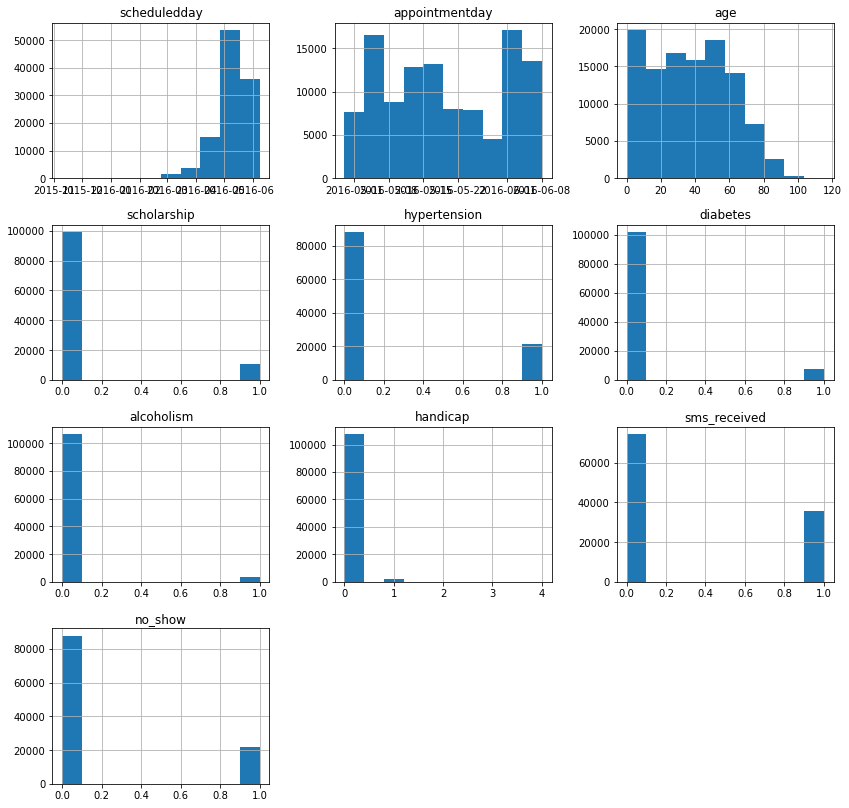

In [29]:
# Let's see some visualizations in order to have some notion about the dataset
df.hist(figsize=(14, 14));

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the dataset, I'll now start some analysis by taking some questions in order to assist on how the analysis will be conducted. There will be four questions to be analyzed, and the conclusions will be written on the last section of this report.

### Research Question 1 - How many of the appointments patients didn't showed up?

In [30]:
# Creating masks for whether or not the patient showed up
show = df.query('no_show == 0')
no_show = df.query('no_show == 1')

In [31]:
# Checking how many rows contain show data
show.shape

(87793, 12)

In [32]:
# Checking how many rows contain no_show data
no_show.shape

(22098, 12)

In [33]:
show_pie = show['no_show'].count()
show_pie

87793

In [34]:
no_show_pie = no_show['no_show'].count()
no_show_pie

22098

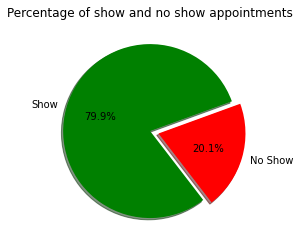

In [35]:
labels = ['Show', 'No Show']
sizes = [show_pie, no_show_pie]
explode = (0, 0.1)
colors = ['green', 'red']

# Plotting
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=20);
plt.title('Percentage of show and no show appointments');

> Its possible to conclude that 1 of 5 patients will miss their appointments, according to the dataset, 79.6% people showed up for their appoitments while 20.1% missed it.

### Research Question 2 - Is the age a factor that could increase the no show rate?

In [36]:
# Show age mean
show.age.mean()

37.796122697709386

In [37]:
# No show age mean
no_show.age.mean()

34.28391709656982

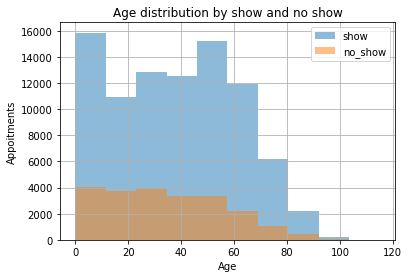

In [38]:
# Making the plot to compare the data
show.age.hist(alpha = 0.5, label='show')
no_show.age.hist(alpha = 0.5, label='no_show')
plt.xlabel('Age')
plt.ylabel('Appoitments')
plt.title('Age distribution by show and no show')
plt.legend();

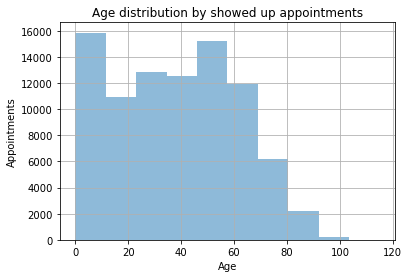

In [39]:
# Splitting the plot to better visualization
show.age.hist(alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Appointments')
plt.title('Age distribution by showed up appointments');

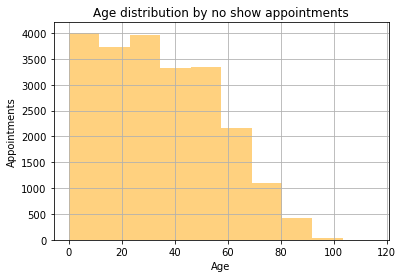

In [40]:
no_show.age.hist(alpha = 0.5, color='orange')
plt.xlabel('Age')
plt.ylabel('Appointments')
plt.title('Age distribution by no show appointments');

> The age seems to have some correlation since yonguer patients have more chance to miss the medical apointment than older people.

### Research Question 3 - Is the scholarship, hypertension, diabetes and handicap a factor that could increase the number of no show appointments?

In [41]:
# Total amount of show appointments
total_show = show['no_show'].count()
total_show

87793

In [42]:
# Amout of show + scholarship = True
show_scholarship = show.query('scholarship == 1')
show_scholarship = show_scholarship.shape[0]
show_scholarship

8245

In [43]:
# Amout of show + hypertension = True
show_hypertension = show.query('hypertension == 1')
show_hypertension = show_hypertension.shape[0]
show_hypertension

17948

In [44]:
# Amout of show + diabetes = True
show_diabetes = show.query('diabetes == 1')
show_diabetes = show_diabetes.shape[0]
show_diabetes

6471

In [45]:
# Amout of show + handicap = True
show_handicap = show.query('handicap == 1')
show_handicap = show_handicap.shape[0]
show_handicap

1665

In [46]:
other_show = total_show - (show_scholarship + show_hypertension + show_diabetes + show_handicap)
other_show

53464

In [47]:
def noshow_pieplot(sizes = [], colors = [], title = ""):
    labels = ['Hypertension', 'Scholarship', 'Diabetes', 'Handicap', 'None']
    explode = (0, 0, 0, 0, 0.1)
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=20)
    plt.title('{}'.format(title))
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(6,6);

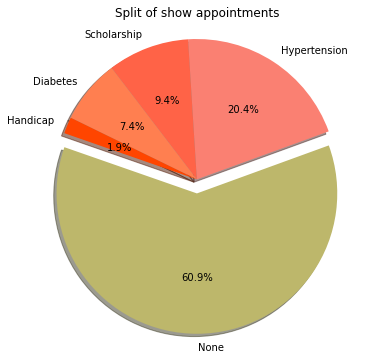

In [48]:
noshow_pieplot(sizes = [show_hypertension, show_scholarship, show_diabetes, show_handicap, other_show], 
              colors = ['salmon', 'tomato', 'coral', 'orangered', 'darkkhaki'],
              title = "Split of show appointments")

In [49]:
# Total amount of no show appointments
total_noshow = no_show['no_show'].count()
total_noshow

22098

In [50]:
# Amout of no show + scholarship = True
noshow_scholarship = no_show.query('scholarship == 1')
noshow_scholarship = noshow_scholarship.shape[0]
noshow_scholarship

2556

In [51]:
# Amout of no show + hypertension = True
noshow_hypertension = no_show.query('hypertension == 1')
noshow_hypertension = noshow_hypertension.shape[0]
noshow_hypertension

3728

In [52]:
# Amout of no show + diabetes = True
noshow_diabetes = no_show.query('diabetes == 1')
noshow_diabetes = noshow_diabetes.shape[0]
noshow_diabetes

1422

In [53]:
# Amout of no show + handicap = True
noshow_handicap = no_show.query('handicap == 1')
noshow_handicap = noshow_handicap.shape[0]
noshow_handicap

358

In [54]:
other_noshow = total_noshow - (noshow_scholarship + noshow_hypertension + noshow_diabetes + noshow_handicap)
other_noshow

14034

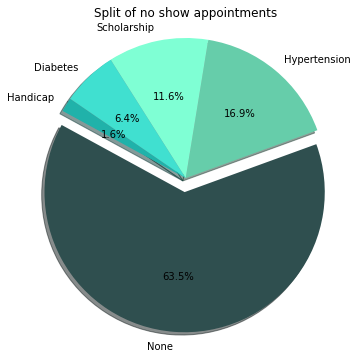

In [55]:
noshow_pieplot(sizes = [noshow_hypertension, noshow_scholarship, noshow_diabetes, noshow_handicap, other_noshow], 
              colors = ['mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'darkslategrey'],
              title = "Split of no show appointments")

> Deep diving into the dataset  was possible to conclute that 36.5% of the patients that misses the medical appointments have Hypertensive, Diabetes, Handicap or have goverment scholarships, but still, it is not the cause for missing medical appointments, since we have an close result of 39.1% for those who showed up in have the same conditions.

### Research Question 4 - The SMS received is associated with actually showing up?

In [56]:
show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [57]:
# Creating masks for SMS received or not
not_received = df.query('sms_received == 0')
received = df.query('sms_received == 1')

In [58]:
not_received.sms_received.value_counts()

0    74409
Name: sms_received, dtype: int64

In [59]:
received.sms_received.value_counts()

1    35482
Name: sms_received, dtype: int64

In [60]:
# Amout of appoitments that did not received SMS and showed up
nosms_show = not_received.query('no_show == 0')
nosms_show = nosms_show.shape[0]
nosms_show

62095

In [61]:
# Amout of appoitments that did not received SMS and did not showed up
nosms_noshow = not_received.query('no_show == 1')
nosms_noshow = nosms_noshow.shape[0]
nosms_noshow

12314

In [62]:
# Creating function for bar plotting
def noshow_barplot(heights = [], title = ""):
    labels = ['No Show', 'Show']
    locations = [1, 2]

    plt.bar(locations, heights, tick_label=labels, color=['red', 'cyan']) 
    plt.title('{}'.format(title))
    plt.xlabel('Distribution')
    plt.ylabel('Amount of Appointments');

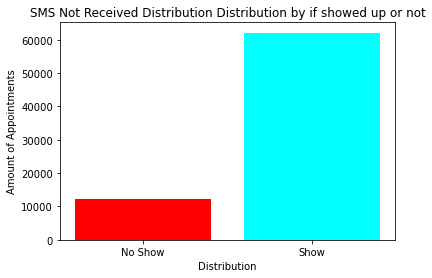

In [63]:
noshow_barplot(heights = [nosms_noshow, nosms_show], title = "SMS Not Received Distribution Distribution by if showed up or not")

In [64]:
# Amout of appoitments that did received SMS and showed up
sms_show = received.query('no_show == 0')
sms_show = sms_show.shape[0]
sms_show

25698

In [65]:
# Amout of appoitments that did received SMS and did not showed up
sms_noshow = received.query('no_show == 1')
sms_noshow = sms_noshow.shape[0]
sms_noshow

9784

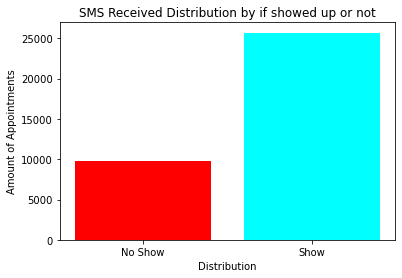

In [66]:
noshow_barplot(heights = [sms_noshow, sms_show], title = "SMS Received Distribution by if showed up or not")

> It seems that SMS notifications is not something that will prevent patients from missing their appointments since when its compared between people that actually received from whose didn't received, more patients has missed their appointments compared when people actually didn't received the SMS notification.

<a id='conclusions'></a>
## Conclusions

> **Limitations**:  Although the current dataset enables us to analyze and identify some causes and trends of patients missing their appointments, its still not enough to identify or make conclusions about if a patient will miss the appointment, perhaps if more features could be added into the dataset in order to increase the analysis prediction of whether or not a patient will miss their medical appointments.

> **Final conclusion**: Its not possible to predict whose patients will miss their appointments but it is already a start on understanding the behavior and profile of those who missed appointments, maybe with more data features regarding the many reasons that can bring someone to miss an appointment could help to be more assertive in a prediction model. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Consulted links:

Matplotlib Pie Chart: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

Pie Chart increase size: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

Matplotlib colors: https://matplotlib.org/stable/gallery/color/named_colors.html

Matplotlib bar chart: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1